# Base y librerias

In [180]:
!pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [182]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [183]:
pd.set_option('display.max_columns', None) #Mostrar todas las columnas
sns.set(rc={'figure.figsize':(12.7,8.6)})

La base de datos cuenta con información de estudiantes de dos escuelas secundarias de Portugal, donde el sistema de calificaciones va de 0 a 20, siendo 10 la minima nota aprobatoria

In [184]:
base = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datos_propios/student-por.csv', 
                 sep = ';',
                 error_bad_lines=False)
base.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


# Verificación calidad

In [185]:
base.shape

(649, 33)

## Datos faltantes


In [186]:
for col in base.columns:
    num_missing = base[col].isnull().sum()
    pct_missing = np.mean(base[col].isnull())
    #print(col," - ",round(pct_missing*100, 2),"% - ",num_missing)
    print('{} - {}% - {}'.format(col,round(pct_missing*100, 2),num_missing))

school - 0.0% - 0
sex - 0.31% - 2
age - 0.0% - 0
address - 0.0% - 0
famsize - 0.31% - 2
Pstatus - 0.31% - 2
Medu - 0.0% - 0
Fedu - 0.0% - 0
Mjob - 0.0% - 0
Fjob - 0.15% - 1
reason - 0.0% - 0
guardian - 0.31% - 2
traveltime - 0.0% - 0
studytime - 0.0% - 0
failures - 0.0% - 0
schoolsup - 0.0% - 0
famsup - 0.31% - 2
paid - 0.0% - 0
activities - 0.0% - 0
nursery - 0.15% - 1
higher - 0.15% - 1
internet - 0.0% - 0
romantic - 0.0% - 0
famrel - 0.0% - 0
freetime - 0.0% - 0
goout - 0.0% - 0
Dalc - 0.0% - 0
Walc - 0.0% - 0
health - 0.0% - 0
absences - 0.0% - 0
G1 - 0.0% - 0
G2 - 0.0% - 0
G3 - 0.0% - 0


In [187]:
base[base.isnull().any(axis=1)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
99,GP,F,16,U,GT3,T,4,3,other,at_home,course,mother,1,3,0,yes,NaN,no,no,yes,yes,yes,no,5,3,5,1,1,3,2,12,13,13
139,GP,F,15,U,GT3,T,4,4,services,at_home,course,NaN,1,3,0,no,yes,no,yes,yes,yes,yes,yes,4,3,3,1,1,5,4,13,14,15
168,GP,M,15,R,GT3,T,2,3,at_home,services,course,mother,1,2,0,yes,NaN,yes,yes,yes,yes,no,no,4,4,4,1,1,1,0,7,8,8
191,GP,M,17,U,NaN,T,3,3,other,other,reputation,father,1,2,0,no,no,no,yes,no,yes,yes,no,4,3,4,1,4,4,4,11,9,10
212,GP,F,17,U,GT3,T,4,4,services,teacher,home,mother,2,1,1,no,yes,no,no,yes,NaN,yes,no,4,2,4,2,3,2,30,14,15,16
275,GP,F,18,U,GT3,T,2,1,other,other,course,other,2,3,0,no,yes,no,no,NaN,yes,yes,yes,4,4,4,1,1,3,10,12,10,11
278,GP,M,17,U,NaN,T,2,3,other,other,course,father,2,1,0,no,no,no,no,yes,yes,yes,no,5,2,2,1,1,2,2,9,12,13
296,GP,NaN,18,U,GT3,T,2,1,other,other,home,mother,1,2,0,no,no,no,yes,yes,yes,yes,no,5,2,4,1,2,4,2,16,16,16
365,GP,NaN,17,U,GT3,A,4,3,services,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,yes,5,2,2,1,2,5,14,15,14,17
405,GP,F,19,U,LE3,A,2,3,at_home,other,home,NaN,2,1,1,no,no,no,no,yes,no,yes,no,2,2,3,3,4,5,16,10,11,11


En total se encontraron 8 variables con valores faltantes, sumando en total 13 individuos con 1 valor faltantes cada uno.

Se opta por eliminar estos valores, que a pesar de tener mas variables con las que construir un modelo, si se desea posterioremnte usar una prueba para ver relación entre estas variables es mejor no tener una categoria tan pequeña en las mismas, siendo que el valor maximo que llegarian a tomar seria de 2

In [188]:
base_sin=base.dropna()
base_sin.reset_index(drop=True)
base_sin.shape

(636, 33)

## consistencia

In [189]:
base_sin.health.value_counts()

5    245
3    121
4    105
1     89
2     76
Name: health, dtype: int64

In [190]:
base_sin.Walc.value_counts()

1    240
2    147
3    119
4     85
5     45
Name: Walc, dtype: int64

In [191]:
base_sin.Dalc.value_counts()

1    440
2    120
3     42
5     17
4     17
Name: Dalc, dtype: int64

In [192]:
base_sin.goout.value_counts()

3    201
2    143
4    136
5    109
1     47
Name: goout, dtype: int64

In [193]:
base_sin.freetime.value_counts()

3    247
4    175
2    101
5     68
1     45
Name: freetime, dtype: int64

In [194]:
base_sin.famrel.value_counts()

4    311
5    174
3    101
2     28
1     22
Name: famrel, dtype: int64

In [195]:
base_sin.romantic.value_counts()

no     401
yes    234
No       1
Name: romantic, dtype: int64

In [196]:
base_sin.internet.value_counts()

yes    486
no     149
Yes      1
Name: internet, dtype: int64

In [197]:
base_sin.higher.value_counts()

yes    569
no      67
Name: higher, dtype: int64

In [198]:
base_sin.nursery.value_counts()

yes    510
no     125
No       1
Name: nursery, dtype: int64

In [199]:
base_sin.activities.value_counts()

no     325
yes    309
Yes      1
No       1
Name: activities, dtype: int64

In [200]:
base_sin.paid.value_counts()

no     596
yes     38
No       2
Name: paid, dtype: int64

In [201]:
base_sin.famsup.value_counts()

yes    392
no     244
Name: famsup, dtype: int64

In [202]:
base_sin.failures.value_counts()

0    539
1     67
2     16
3     14
Name: failures, dtype: int64

In [203]:
base_sin.studytime.value_counts()

2    301
1    208
3     92
4     35
Name: studytime, dtype: int64

In [204]:
base_sin.traveltime.value_counts()

1    358
2    208
3     54
4     16
Name: traveltime, dtype: int64

In [205]:
base_sin.guardian.value_counts()

mother    447
father    150
other      39
Name: guardian, dtype: int64

In [206]:
base_sin.reason.value_counts()

course        277
home          146
reputation    142
other          71
Name: reason, dtype: int64

In [207]:
base_sin.Fjob.value_counts()

other       361
services    177
at_home      40
teacher      35
health       23
Name: Fjob, dtype: int64

In [208]:
base_sin.Mjob.value_counts()

other       252
services    133
at_home     131
teacher      72
health       48
Name: Mjob, dtype: int64

In [209]:
base_sin.Fedu.value_counts()

2    208
1    171
4    126
3    124
0      7
Name: Fedu, dtype: int64

In [210]:
base_sin.Medu.value_counts()

2    180
4    171
1    141
3    138
0      6
Name: Medu, dtype: int64

In [211]:
base_sin.Pstatus.value_counts()

T    558
A     77
B      1
Name: Pstatus, dtype: int64

In [212]:
base_sin.famsize.value_counts()

GT3    445
LE3    191
Name: famsize, dtype: int64

In [213]:
base_sin.address.value_counts()

U    440
R    196
Name: address, dtype: int64

In [214]:
base_sin.sex.value_counts()

F    375
M    261
Name: sex, dtype: int64

In [215]:
base_sin.schoolsup.value_counts()

no     570
yes     64
Yes      1
No       1
Name: schoolsup, dtype: int64

In [216]:
base_sin.school.value_counts()

GP    413
MS    223
Name: school, dtype: int64

In [217]:
base_sin.loc[:,'schoolsup']=base_sin.loc[:,'schoolsup'].map(lambda x: 'yes' if x == 'Yes' else x)
base_sin.loc[:,'schoolsup']=base_sin.loc[:,'schoolsup'].map(lambda x: 'no' if x == 'No' else x)
base_sin.loc[:,'paid']=base_sin.loc[:,'paid'].map(lambda x: 'no' if x == 'No' else x)
base_sin.loc[:,'activities']=base_sin.loc[:,'activities'].map(lambda x: 'yes' if x == 'Yes' else x)
base_sin.loc[:,'activities']=base_sin.loc[:,'activities'].map(lambda x: 'no' if x == 'No' else x)
base_sin.loc[:,'nursery']=base_sin.loc[:,'nursery'].map(lambda x: 'no' if x == 'No' else x)
base_sin.loc[:,'internet']=base_sin.loc[:,'internet'].map(lambda x: 'yes' if x == 'Yes' else x)
base_sin.loc[:,'romantic']=base_sin.loc[:,'romantic'].map(lambda x: 'no' if x == 'No' else x)
base_sin=base_sin.query('Pstatus != \'B\'')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Las variables:
- schoolsup
- paid
- activities
- nursery
- internet
- romantinc

Tienen mayusculas en las inciales de algunas observaciones, se vuelven todas una misma categoria en común.

Ademas, la variable Pstatus tenia un elemento con valor "B", el cual no existe dentro del diccionario, por esta incongrucneic ase decide eliminar

In [218]:
base_sin[['G3','G2','G1','absences']].describe()

,G3,G2,G1,absences
count,635.000000,635.000000,635.000000,635.000000
mean,11.948031,11.571654,11.420472,3.598425
std,3.369768,2.923172,2.796667,4.509471
min,0.000000,0.000000,0.000000,0.000000
25%,10.000000,10.000000,10.000000,0.000000
50%,12.000000,11.000000,11.000000,2.000000
75%,14.000000,13.000000,13.000000,6.000000
max,36.000000,19.000000,25.000000,32.000000


Para las variables correspondientes a la notas de los 3 periodos, se encontro que en los periodos 1 y 3 hay valores que superan el limite de la escala de la nota (siendo que esta va desde 0 hasta 20). Ya se un error de digitación o hacerlo de esta forma para descartar a los mismos, se opta por removerlos de la base.

## Duplicados

No tiene sentido buscar duplicados dentro de la base al no existir un codigo de identificación para saber si dos individuios son los mismos, ya que pueden haber registros iguales para diferentes individuos. Con esto dicho, la base resultante fue:

In [219]:
base_final= base_sin.query('G1<=20 & G3<=20')
base_final.reset_index(drop=True)
base_final.shape

(633, 33)

In [220]:
base_final.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


## Resumen de hallazgos

Se encontro que la base tenia 13 valores faltanes, distribuidos entre 8 categorias. Al solo corresponder menor del 3% de la muestra, se opta por eliminarlos. Con respecto a las notas, se hayo que tanto G1 como G3 tenian un elemento fuera de sus posibles valores. Se solucionó removiendolos de la base, ya que podrian afectar la estimación del modelo al ser valores atipicos. Finalmente, no se hizo revisión de duplicados al no tener sentido por no existir una variable "indice" para corroborar que los registros sean unicos por usuario. Aquellas "upper case" encontradas en las variables categoricas se convirtieron el "lower case" para que todas sean iguales y se elimino el valor "B" en pstatus.

## Analisis exploratorio

La base cuenta con 33 variables, siendo en su mayoria de caracter categorico, quitando la edad, numero de faltas y las notas de los 3 periodos academicos. La variable failures, correspondiente a la cantidad de materias pasadas perdidas, puede llegar a tener valores entre 0 y 4, siendo el 4 representante de la categoria "4 o mas", pero en este caso particular la misma no cuenta con esta

In [221]:
base_final.failures.value_counts()

0    536
1     67
2     16
3     14
Name: failures, dtype: int64

Con respecto a las variables categoricas, sus modas (valores mas frecuentes) son:

In [222]:
base_final.drop(['age','absences','G1','G2','G3'],axis=1).mode()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health
0,GP,F,U,GT3,T,2,2,other,other,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,3,1,1,5


Viendo como en su mayoria las personas gozan de buena salud, la muestra fue en mayor medida conformada por mujeres, las familias estan conformadas por mas de 3 personas y usan menos de 15 minutos para ir a la escuela.

Siendo G3 nuestro objetivo a estimar, se busca realizar un esquema de clasificación para saber si los estudiantes aprovaran en el tercer periodo, tomando como minimo aprovatorio una nota de 10.

In [223]:
base_final.loc[:,'G3_d']=base_final.loc[:,'G3'].map(lambda x: 1 if x >= 10 else 0)
base_final.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G3_d
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,1
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,1


In [224]:
base_final.G3_d.value_counts()

1    536
0     97
Name: G3_d, dtype: int64

In [225]:
nombres=base_final.columns[0:-5]

In [226]:
import researchpy as rp
nombres=base_final.columns[0:-5]
pvalue=[]
for col in nombres:
  crosstab, test_results, expected = rp.crosstab(base_final['G3_d'], base_final[col],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
  pvalue.append(test_results.results[1])
unir=pd.DataFrame(pvalue,index=nombres)
unir=unir.drop(index=['age'])
print(unir.sort_values(0))

                 0
school      0.0000
higher      0.0000
failures    0.0000
studytime   0.0002
Fedu        0.0002
reason      0.0003
Medu        0.0007
famrel      0.0008
address     0.0020
goout       0.0065
Dalc        0.0133
Walc        0.0302
romantic    0.0334
freetime    0.0369
sex         0.0622
internet    0.0623
Mjob        0.0737
guardian    0.1009
activities  0.1511
famsize     0.2181
schoolsup   0.3042
paid        0.3119
traveltime  0.3549
famsup      0.3932
health      0.4500
Fjob        0.6869
nursery     0.9322
Pstatus     0.9460


Mediante la prueba de independencia Chi-cuadrado, cuya hipotesis es:

$$ H_0=Independencia \\ H_a=Relacionada$$

Con un p-valor inferior a 0.05, se encontro que las variables que tienen relación sobre si el estudiante aprovara o no el tercer periodo son:

- school      
- higher      
- failures    
- studytime   
- Fedu       
- reason     
- Medu       
- famrel
- address
- goout
- Dalc
- Walc
- romantic
- freetime

Por parte de las variables numercias:

Text(0.5, 1.0, 'Edad')

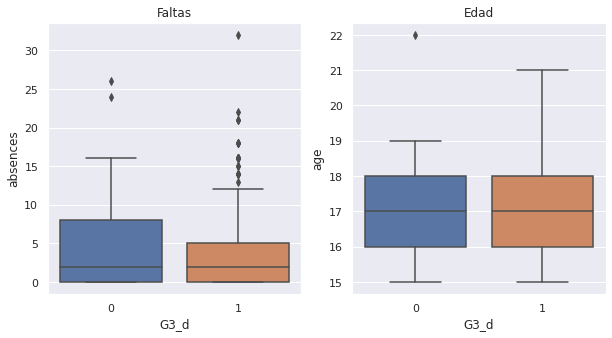

In [227]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.boxplot(data=base_final, x="G3_d", y="absences", ax=axes[0])
axes[0].set_title("Faltas")
sns.boxplot(data=base_final, x="G3_d", y="age",  ax=axes[1])
axes[1].set_title("Edad")

No se aprecia una asociación muy marcada entre las variables edad y faltas.

## Selección de variables


Para la selección, se usaran las variables con mayor relación segundo el criterio de Crammer's V

In [228]:
nombres=['school','higher','failures','studytime','Fedu','reason','Medu','famrel','address','goout','Dalc','Walc','romantic','freetime']
crammer=[]
gl=[]
for col in nombres:
  crosstab, test_results, expected = rp.crosstab(base_final['G3_d'], base_final[col],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
  gl.append(min(crosstab.shape[0]-2,crosstab.shape[1]-2))
  crammer.append(test_results.results[2])
unir={'grados': gl,'crammers v':crammer}
unir=pd.DataFrame(unir, index=nombres)
print(unir.sort_values(by='crammers v', ascending=False))

           grados  crammers v
failures        1      0.4091
higher          1      0.3098
school          1      0.3031
Fedu            1      0.1885
studytime       1      0.1767
Medu            1      0.1746
famrel          1      0.1728
reason          1      0.1714
goout           1      0.1501
Dalc            1      0.1412
Walc            1      0.1300
freetime        1      0.1271
address         1      0.1230
romantic        1      0.0845


Las 5 variables que muestran un mayor grado de asociación con la nota aprobatoria del tercer periodo son:
- failures
- higher
- school
- Fedu
- studytime

# Construcción y entrenamiento del modelo

Creación de un nuevo dataset con variables dummy. A pesar de ser mencionado ue existe la posibilidad de tener un valor de 4, la variable failures en el dataset solo tiene hasta 3, por lo que su partición sera unicamente en 3 variables

In [229]:
base_final.failures.value_counts()

0    536
1     67
2     16
3     14
Name: failures, dtype: int64

Procedimiento a mano (me entere tarde que habia una función)

In [230]:
modelo=base_final.loc[:,['G3_d','failures','higher','school','Fedu','studytime']]
modelo.loc[:,'failures_1']=base_final.loc[:,'failures'].map(lambda x: 1 if x == 1 else 0)
modelo.loc[:,'failures_2']=base_final.loc[:,'failures'].map(lambda x: 1 if x == 2 else 0)
modelo.loc[:,'failures_3']=base_final.loc[:,'failures'].map(lambda x: 1 if x == 3 else 0)
modelo.loc[:,'higher_yes']=base_final.loc[:,'higher'].map(lambda x: 1 if x == 'yes' else 0)
modelo.loc[:,'school_gp']=base_final.loc[:,'school'].map(lambda x: 1 if x == 'GP' else 0)
modelo.loc[:,'fedu_1']=base_final.loc[:,'Fedu'].map(lambda x: 1 if x == 1 else 0)
modelo.loc[:,'fedu_2']=base_final.loc[:,'Fedu'].map(lambda x: 1 if x == 2 else 0)
modelo.loc[:,'fedu_3']=base_final.loc[:,'Fedu'].map(lambda x: 1 if x == 3 else 0)
modelo.loc[:,'fedu_4']=base_final.loc[:,'Fedu'].map(lambda x: 1 if x == 4 else 0)
modelo.loc[:,'studytime_2']=base_final.loc[:,'studytime'].map(lambda x: 1 if x == 2 else 0)
modelo.loc[:,'studytime_3']=base_final.loc[:,'studytime'].map(lambda x: 1 if x == 3 else 0)
modelo.loc[:,'studytime_4']=base_final.loc[:,'studytime'].map(lambda x: 1 if x == 4 else 0)
modelo=modelo.drop(['failures','higher','school','Fedu','studytime'],axis=1)
modelo.head()

,G3_d,failures_1,failures_2,failures_3,higher_yes,school_gp,fedu_1,fedu_2,fedu_3,fedu_4,studytime_2,studytime_3,studytime_4
0,1,0,0,0,1,1,0,0,0,1,1,0,0
1,1,0,0,0,1,1,1,0,0,0,1,0,0
2,1,0,0,0,1,1,1,0,0,0,1,0,0
3,1,0,0,0,1,1,0,1,0,0,0,1,0
4,1,0,0,0,1,1,0,0,1,0,1,0,0


## Dataset completo

El rango de valores que tomara C en la regresión es:

In [231]:
from sklearn import metrics
c_range = 10.**np.arange(-2, 1)
c_range
X= modelo.drop('G3_d',axis=1)
y= modelo['G3_d']

### Ridge

In [232]:
from sklearn.linear_model import LogisticRegression
ridge_pred_loss=[]
solvers=['newton-cg','liblinear','sag']
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l2',solver=solvers[j],multi_class='auto')
  logreg.fit(X, y)
  y_pred=logreg.predict_proba(X)
  ridge_pred_loss.append(metrics.log_loss(y, y_pred))
  j=j+1

ridge_pred_pre=[]
solvers=['newton-cg','liblinear','sag']
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l2',solver=solvers[j],multi_class='auto')
  logreg.fit(X, y)
  y_pred=logreg.predict(X)
  ridge_pred_pre.append(metrics.precision_score(y, y_pred))
  j=j+1

print(ridge_pred_pre,ridge_pred_loss)

[0.8467614533965245, 0.8562197092084006, 0.8904109589041096] [0.3973843711504436, 0.33590975356993164, 0.3117496818212176]


### Lasso

In [233]:
from sklearn.linear_model import LogisticRegression
lasso_pred_loss=[]
solvers=['liblinear','saga','liblinear']
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l1',solver=solvers[j],multi_class='auto')
  logreg.fit(X, y)
  y_pred=logreg.predict_proba(X)
  lasso_pred_loss.append(metrics.log_loss(y, y_pred))
  j=j+1

lasso_pred_pre=[]
solvers=['liblinear','saga','liblinear']
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l1',solver=solvers[j],multi_class='auto')
  logreg.fit(X, y)
  y_pred=logreg.predict(X)
  lasso_pred_pre.append(metrics.precision_score(y, y_pred))
  j=j+1

print(lasso_pred_pre,lasso_pred_loss)

[0.8467614533965245, 0.8536977491961415, 0.8911917098445595] [0.4725958353469287, 0.353374028649777, 0.31170331041361043]


## partición 80/20

### Ridge

In [234]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69)

ridge_pred_loss_80=[]
solvers=['newton-cg','liblinear','sag']
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l2',solver=solvers[j],multi_class='auto')
  logreg.fit(X_train, y_train)
  y_pred=logreg.predict_proba(X_test)
  ridge_pred_loss_80.append(metrics.log_loss(y_test, y_pred))
  j=j+1

ridge_pred_pre_80=[]
solvers=['newton-cg','liblinear','sag']
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l2',solver=solvers[j],multi_class='auto')
  logreg.fit(X_train, y_train)
  y_pred=logreg.predict(X_test)
  ridge_pred_pre_80.append(metrics.precision_score(y_test, y_pred))
  j=j+1

print(ridge_pred_pre_80,ridge_pred_loss_80)

[0.8490566037735849, 0.8490566037735849, 0.8627450980392157] [0.4058259169687813, 0.36634031227550207, 0.3583845738124801]


### Lasso

In [235]:
lasso_pred_loss_80=[]
solvers=['liblinear','saga','liblinear']
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l1',solver=solvers[j],multi_class='auto')
  logreg.fit(X_train, y_train)
  y_pred=logreg.predict_proba(X_test)
  lasso_pred_loss_80.append(metrics.log_loss(y_test, y_pred))
  j=j+1

lasso_pred_pre_80=[]
solvers=['liblinear','saga','liblinear']
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l1',solver=solvers[j],multi_class='auto')
  logreg.fit(X_train, y_train)
  y_pred=logreg.predict(X_test)
  lasso_pred_pre_80.append(metrics.precision_score(y_test, y_pred))
  j=j+1

print(lasso_pred_pre_80,lasso_pred_loss_80)

[0.8490566037735849, 0.8490566037735849, 0.8609271523178808] [0.5241012699094103, 0.37495918180304827, 0.35969945503862794]


## Tabla 80/20

In [257]:
tabla=np.array([ridge_pred_loss_80,
               ridge_pred_pre_80,
               lasso_pred_loss_80,
               lasso_pred_pre_80])
frame=pd.DataFrame(tabla.T, index=c_range,columns=['Log loss ridge','precisión ridge','Log loss lasso','precisión lasso'])
frame

,Log loss ridge,precisión ridge,Log loss lasso,precisión lasso
0.01,0.405826,0.849057,0.524101,0.849057
0.10,0.366340,0.849057,0.374959,0.849057
1.00,0.358385,0.862745,0.359699,0.860927


Segun se aprecia en la tabla, el mejor modelo es usando una regresion ridge con parametros C=1 y solver="sag"

## K-folds k=10

### Ridge

In [236]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, random_state=666, shuffle=True)
from sklearn.model_selection import cross_val_score

solvers=['newton-cg','liblinear','sag']
ridge_pred_pre_k10=[]
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l2',solver=solvers[j],multi_class='auto')
  scores = cross_val_score(logreg, X_train, y_train, scoring='precision', cv=cv, n_jobs=-1)
  ridge_pred_pre_k10.append(np.mean(scores))
  j+=1

solvers=['newton-cg','liblinear','sag']
ridge_pred_loss_k10=[]
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l2',solver=solvers[j],multi_class='auto')
  scores = cross_val_score(logreg, X_train, y_train, scoring='neg_log_loss', cv=cv, n_jobs=-1)
  ridge_pred_loss_k10.append(abs(np.mean(scores)))
  j+=1

print(ridge_pred_pre_k10,ridge_pred_loss_k10)

[0.8459219858156029, 0.8608837566226558, 0.8863543045967226] [0.4068522421103994, 0.3449104502562916, 0.3222238370429337]


### Lasso

In [237]:
solvers=['liblinear','saga','liblinear']
lasso_pred_pre_k10=[]
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l1',solver=solvers[j],multi_class='auto')
  scores = cross_val_score(logreg, X_train, y_train, scoring='precision', cv=cv, n_jobs=-1)
  lasso_pred_pre_k10.append(np.mean(scores))
  j+=1

solvers=['liblinear','saga','liblinear']
lasso_pred_loss_k10=[]
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l1',solver=solvers[j],multi_class='auto')
  scores = cross_val_score(logreg, X_train, y_train, scoring='neg_log_loss', cv=cv, n_jobs=-1)
  lasso_pred_loss_k10.append(abs(np.mean(scores)))
  j+=1

print(lasso_pred_pre_k10,lasso_pred_loss_k10)

[0.8628366491664364, 0.8459219858156029, 0.886977123761724] [0.5458166523643224, 0.37741387490875133, 0.3246439120232766]


## K-folds k=5

### Ridge

In [238]:
cv = KFold(n_splits=5, random_state=666, shuffle=True)

solvers=['newton-cg','liblinear','sag']
ridge_pred_pre_k5=[]
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l2',solver=solvers[j],multi_class='auto')
  scores = cross_val_score(logreg, X_train, y_train, scoring='precision', cv=cv, n_jobs=-1)
  ridge_pred_pre_k5.append(np.mean(scores))
  j+=1

solvers=['newton-cg','liblinear','sag']
ridge_pred_loss_k5=[]
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l2',solver=solvers[j],multi_class='auto')
  scores = cross_val_score(logreg, X_train, y_train, scoring='neg_log_loss', cv=cv, n_jobs=-1)
  ridge_pred_loss_k5.append(abs(np.mean(scores)))
  j+=1

print(ridge_pred_pre_k5,ridge_pred_loss_k5)

[0.8460022396416574, 0.8559719362464729, 0.8806524512532772] [0.41095607168780496, 0.34816606953536827, 0.32281721276133263]


### Lasso

In [239]:
solvers=['liblinear','saga','liblinear']
lasso_pred_pre_k5=[]
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l1',solver=solvers[j],multi_class='auto')
  scores = cross_val_score(logreg, X_train, y_train, scoring='precision', cv=cv, n_jobs=-1)
  lasso_pred_pre_k5.append(np.mean(scores))
  j+=1

solvers=['liblinear','saga','liblinear']
lasso_pred_loss_k5=[]
j=0
for i in c_range:
  logreg = LogisticRegression(C=i, penalty='l1',solver=solvers[j],multi_class='auto')
  scores = cross_val_score(logreg, X_train, y_train, scoring='neg_log_loss', cv=cv, n_jobs=-1)
  lasso_pred_loss_k5.append(abs(np.mean(scores)))
  j+=1

print(lasso_pred_pre_k5,lasso_pred_loss_k5)

[0.8566192266459358, 0.8460022396416574, 0.8835025200901561] [0.5816628570310787, 0.3859835670283625, 0.323730464213518]


## K-folds tabla log loss

In [255]:
tabla=np.array([ridge_pred_loss_k10,
               lasso_pred_loss_k10,
               ridge_pred_loss_k5,
               lasso_pred_loss_k5])
frame=pd.DataFrame(tabla.T, index=c_range,columns=['ridge k10','lasso k10','ridge k5','lasso k5'])
frame

,ridge k10,lasso k10,ridge k5,lasso k5
0.01,0.406852,0.545817,0.410956,0.581663
0.10,0.344910,0.377414,0.348166,0.385984
1.00,0.322224,0.324644,0.322817,0.323730


Segun el k-folds, el mejor modelo es un Ridge con parametros C=1 y solver="sag". Por ambos metodos se obtuvo el mismo modelo, por lo que se asume como el mejor

# Conclusiones

In [272]:
logreg = LogisticRegression(C=1, penalty='l2',solver='sag',multi_class='auto')
logreg.fit(X_train,y_train)
a=pd.DataFrame(logreg.coef_.T, index=X.columns,columns=['Bethas'])
print(a,"\n \n Intercepto ",logreg.intercept_)

               Bethas
failures_1  -1.343202
failures_2  -1.634941
failures_3  -1.787345
higher_yes   1.104559
school_gp    1.343998
fedu_1      -0.492309
fedu_2      -0.226100
fedu_3       0.687577
fedu_4      -0.134601
studytime_2  0.457399
studytime_3  0.767738
studytime_4  0.488015 
 
 Intercepto  [0.34578748]


La interpretación del intercepto corresponde a la ausencia de las demas variables dicotomicas, es decir que correspondan a su variable dominio, las probabilidades logaritmicas de que el estudiante apruebe aumentan en 0.3457.

Con respecto a los demas bethas, sus interpretaciones vienen siendo en comparación a la variable dominio. Por ejemplo, los estudiantes que tienen 1 materia perdida, sus probabilidades logaritmicas de aprobar el tercer periodo son 1.3432 unidades menores a que si tuviera 0 materias perdidas. Todas las interpretaciones van sujetas a su signo para representar si las probabilidades logaritmicas aumentan o disminuyen en comparación a la variable dominio.